In [1]:
# %pip install numpy==1.26.4
# %pip install catboost
from catboost import CatBoostRegressor

In [2]:
import pandas as pd

In [3]:
# %pip install scikit-learn
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
df = pd.read_csv("df_merged_cleaned.csv")

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week

In [12]:
X = df.drop(columns=['Цена на арматуру'])
y = df['Цена на арматуру']

In [46]:
# Разделение на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [82]:
# Обучение модели CatBoost
model = CatBoostRegressor(iterations=10000, learning_rate=0.03, depth=6, loss_function='MAE', verbose=1, early_stopping_rounds=100)
model.fit(X_train, y_train)

0:	learn: 6535.1081901	total: 1.1ms	remaining: 11s
1:	learn: 6370.2608544	total: 2.12ms	remaining: 10.6s
2:	learn: 6249.7178075	total: 3.03ms	remaining: 10.1s
3:	learn: 6135.3140832	total: 3.93ms	remaining: 9.81s
4:	learn: 5981.7259556	total: 4.81ms	remaining: 9.63s
5:	learn: 5857.9864124	total: 5.67ms	remaining: 9.44s
6:	learn: 5733.2549150	total: 6.58ms	remaining: 9.39s
7:	learn: 5579.6959782	total: 7.59ms	remaining: 9.47s
8:	learn: 5496.7945301	total: 8.53ms	remaining: 9.47s
9:	learn: 5404.8424084	total: 9.44ms	remaining: 9.43s
10:	learn: 5272.1717150	total: 10.4ms	remaining: 9.48s
11:	learn: 5152.9054766	total: 11.3ms	remaining: 9.39s
12:	learn: 5070.3516826	total: 12.1ms	remaining: 9.31s
13:	learn: 4950.3929451	total: 12.9ms	remaining: 9.21s
14:	learn: 4837.5101771	total: 13.9ms	remaining: 9.23s
15:	learn: 4725.5046035	total: 14.9ms	remaining: 9.27s
16:	learn: 4644.7539091	total: 15.9ms	remaining: 9.32s
17:	learn: 4554.4203758	total: 16.7ms	remaining: 9.27s
18:	learn: 4486.0514817

In [83]:
# Прогнозирование на тестовой выборке
predictions = model.predict(X_test)

In [84]:
# Оценка модели
mae = mean_absolute_error(y_test, predictions)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print('R2 score:', r2_score(y_test, predictions))
print('MSE score:', mean_squared_error(y_test, predictions))

Средняя абсолютная ошибка (MAE): 4927.981481112995
R2 score: 0.6683658904732467
MSE score: 43454511.05592351


In [85]:
# %pip install matplotlib

import matplotlib.pyplot as plt

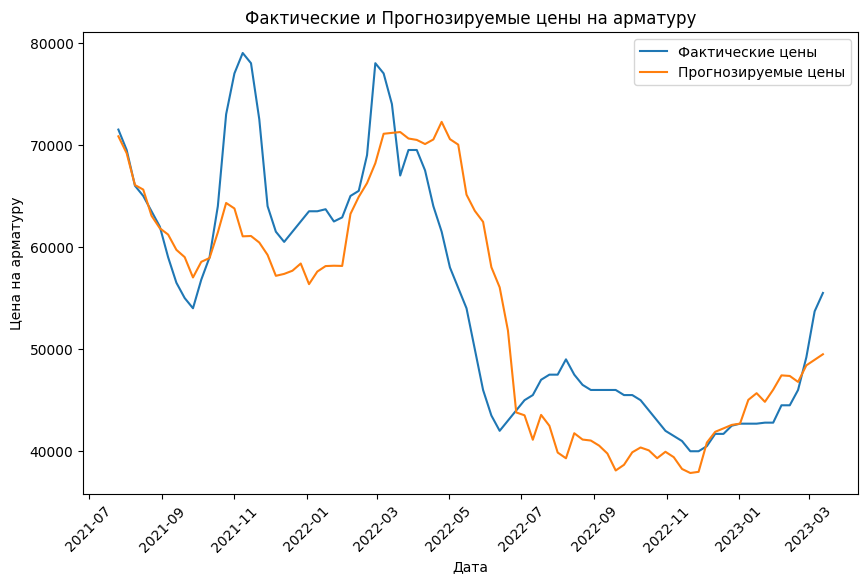

In [87]:
# Визуализация фактических и предсказанных цен
plt.figure(figsize=(10, 6))
plt.plot(df["Date"].iloc[-len(y_test):], y_test, label="Фактические цены")
plt.plot(df["Date"].iloc[-len(y_test):], predictions, label="Прогнозируемые цены")
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Фактические и Прогнозируемые цены на арматуру")
plt.xticks(rotation=45)
plt.show()

In [88]:
import pickle
with open('CatBoost_model.pkl', 'wb') as f: pickle.dump(model, f)